In [1]:
#imports for the lab
import pandas as pd
from sklearn import cluster
from sklearn import metrics
import matplotlib.pyplot as plt


In [2]:
#pre proccessing for Wave data
waveColumns=['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20', '21','Class'] 
waveData = pd.read_csv('waveform.data', names=waveColumns)
waveData = waveData.drop(['Class'], axis=1)
waveData

,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
0,-1.23,-1.56,-1.75,-0.28,0.60,2.22,0.85,0.21,-0.20,0.89,...,4.20,2.89,7.75,4.59,3.15,5.12,3.32,1.20,0.24,-0.56
1,-0.69,2.43,0.61,2.08,2.30,3.25,5.52,4.55,2.97,2.22,...,1.61,1.24,1.89,1.88,-1.34,0.83,1.41,1.78,0.60,2.42
2,-0.12,-0.94,1.29,2.59,2.42,3.55,4.94,3.25,1.90,2.07,...,1.45,2.50,0.12,1.41,2.78,0.64,0.62,-0.01,-0.79,-0.12
3,0.86,0.29,2.19,-0.02,1.13,2.51,2.37,5.45,5.45,4.84,...,4.05,2.58,1.40,1.24,1.41,1.07,-1.43,2.84,-1.18,1.12
4,1.16,0.37,0.40,-0.59,2.66,1.00,2.69,4.06,5.34,3.53,...,4.79,4.30,1.84,1.73,0.21,-0.18,0.13,-0.21,-0.80,-0.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,-0.65,0.69,2.29,-0.16,0.51,0.26,2.34,-0.42,0.49,0.31,...,4.54,3.46,4.81,5.49,5.19,3.10,3.86,2.96,1.09,-1.42
4996,-0.02,0.67,2.34,3.18,2.16,4.77,6.70,4.54,4.92,3.39,...,1.50,1.53,2.52,1.14,-1.56,-1.18,-0.56,0.02,-1.05,-0.18
4997,0.01,-1.99,0.16,2.30,-0.53,1.93,3.61,3.00,4.61,5.73,...,4.25,3.14,3.04,1.61,0.60,-0.52,0.62,1.00,1.21,-0.27
4998,-0.40,0.41,-0.48,1.04,0.79,-0.66,1.18,0.52,2.20,0.59,...,4.85,3.64,3.62,5.97,2.63,3.83,1.72,2.08,1.31,1.37


In [3]:
#pre proccessing for breast cancer data
cancerColumns=['0','1','2','3','4','5','6','7','8','9','Class']
missing_values = ["?"]
cancerData = pd.read_csv('breast-cancer-wisconsin.data', names=cancerColumns, na_values = missing_values)
cancerData =  cancerData.drop(['0'],axis=1)
cancerData = cancerData.drop(['Class'], axis=1)
cancerData

#missing values in column 6 replaced with mean of the attribute
avg = round(cancerData['6'].mean())
cancerData.replace('NaN', avg, inplace=True)

cancerData = cancerData.fillna(int(avg))
cancerData


,1,2,3,4,5,6,7,8,9
0,5,1,1,1,2,1.0,3,1,1
1,5,4,4,5,7,10.0,3,2,1
2,3,1,1,1,2,2.0,3,1,1
3,6,8,8,1,3,4.0,3,7,1
4,4,1,1,3,2,1.0,3,1,1
...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2.0,1,1,1
695,2,1,1,1,2,1.0,1,1,1
696,5,10,10,3,7,3.0,8,10,2
697,4,8,6,4,3,4.0,10,6,1


## part 1


waveData k means

Text(0, 0.5, 'SSE')

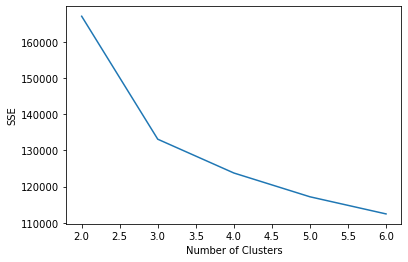

In [4]:
numClusters = [2,3,4,5,6]
SSE = []

for i in numClusters:
    k_means = cluster.KMeans(n_clusters=i, max_iter=50, random_state=1)
    k_means.fit(waveData) 
    SSE.append(k_means.inertia_)

    

plt.plot(numClusters, SSE)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')

The elbow method shows that the best number of clusters is 3

## Cancer Data

Cancer data k means

Text(0, 0.5, 'SSE')

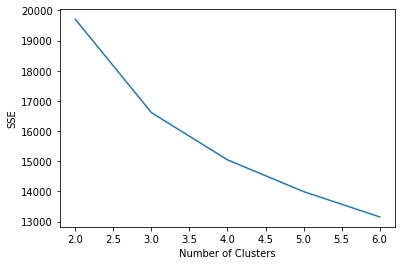

In [5]:
#cancerData
%matplotlib inline

numClusters = [2,3,4,5,6]
SSE = []

for i in numClusters:
    #randomize the data
    #randWaveData = shuffle(waveData)
    k_means = cluster.KMeans(n_clusters=i, max_iter=50, random_state=1)
    k_means.fit(cancerData) 
    SSE.append(k_means.inertia_)

    
plt.plot(numClusters, SSE)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')

The elbow method shows that the best number of clusters is 3

## Finding neartest points to cluster centers for each k value

cancer data

In [6]:
k_means = cluster.KMeans(n_clusters=2, max_iter=50, random_state=1)
k_means.fit(cancerData) 
centroids = k_means.cluster_centers_

In [7]:
centData = pd.DataFrame(centroids,columns=cancerData.columns)
centData

,1,2,3,4,5,6,7,8,9
0,3.032328,1.295259,1.435345,1.338362,2.088362,1.375000,2.092672,1.247845,1.109914
1,7.153191,6.765957,6.706383,5.706383,5.442553,7.859574,6.093617,6.063830,2.536170


In [8]:
k = 2
print("k = ", k)
#2d array that holds closest 5 points to each cluster center, points represented by the index of their row in the data frame

#2d array that holds the 5 closest for each cluster for k = 2 shape should be 2 rows 5 columns
closest = []


for centerNum in range(k):
    #sets x to the row from centData
    X = centData.iloc[[centerNum]]
    Y = cancerData
    closest5 = []
    for i in range(5):
        #metrics does it by kernel so find 5 points closest to first kernels center first then the does the second one
        closestRow = metrics.pairwise_distances_argmin_min(X, Y, metric='euclidean')
        #metrics function returns a 2d array where the [0][0] index is the index of the cancerData row that is closest
        Y = Y.drop(closestRow[0][0])
        closest5.append(closestRow[0][0])
    
    #append the list of 5 closest points to the overall list of closest 5 points to every cluster center
    closest.append(closest5)
    print("cluster number: ", centerNum)
    print(closest[centerNum])

k =  2
cluster number:  0
[22, 198, 197, 196, 195]
cluster number:  1
[467, 200, 230, 229, 228]


In [9]:
k = 3
print("k = ", k)

k_means = cluster.KMeans(n_clusters=k, max_iter=50, random_state=1)
k_means.fit(cancerData) 
centroids = k_means.cluster_centers_

centData = pd.DataFrame(centroids,columns=cancerData.columns)
centData = centData
centData

#2d array that holds the 5 closest for each cluster for k = 2 shape should be 2 rows 5 columns
closest = []


for centerNum in range(k):
    #sets x to the row from centData
    X = centData.iloc[[centerNum]]
    Y = cancerData
    closest5 = []
    for i in range(5):
        #metrics does it by kernel so find 5 points closest to first kernels center first then the does the second one
        closestRow = metrics.pairwise_distances_argmin_min(X, Y, metric='euclidean')
        #metrics function returns a 2d array where the [0][0] index is the index of the cancerData row that is closest
        Y = Y.drop(closestRow[0][0])
        closest5.append(closestRow[0][0])
    
    #append the list of 5 closest points to the overall list of closest 5 points to every cluster center
    closest.append(closest5)
    print("cluster number: ", centerNum)
    print(closest[centerNum])

k =  3
cluster number:  0
[22, 198, 197, 196, 195]
cluster number:  1
[231, 316, 315, 314, 313]
cluster number:  2
[223, 338, 337, 336, 335]


In [10]:
k = 4
print("k = ", k)
k_means = cluster.KMeans(n_clusters=k, max_iter=50, random_state=1)
k_means.fit(cancerData) 
centroids = k_means.cluster_centers_

centData = pd.DataFrame(centroids,columns=cancerData.columns)
centData = centData
centData

#2d array that holds the 5 closest for each cluster for k = 2 shape should be 2 rows 5 columns
closest = []


for centerNum in range(k):
    #sets x to the row from centData
    X = centData.iloc[[centerNum]]
    Y = cancerData
    closest5 = []
    for i in range(5):
        #metrics does it by kernel so find 5 points closest to first kernels center first then the does the second one
        closestRow = metrics.pairwise_distances_argmin_min(X, Y, metric='euclidean')
        #metrics function returns a 2d array where the [0][0] index is the index of the cancerData row that is closest
        Y = Y.drop(closestRow[0][0])
        closest5.append(closestRow[0][0])
    
    #append the list of 5 closest points to the overall list of closest 5 points to every cluster center
    closest.append(closest5)
    print("cluster number: ", centerNum)
    print(closest[centerNum])

k =  4
cluster number:  0
[22, 198, 197, 196, 195]
cluster number:  1
[317, 183, 230, 229, 228]
cluster number:  2
[339, 223, 332, 331, 330]
cluster number:  3
[308, 632, 631, 630, 629]


In [11]:
k = 5
print("k = ", k)

k_means = cluster.KMeans(n_clusters=k, max_iter=50, random_state=1)
k_means.fit(cancerData) 
centroids = k_means.cluster_centers_

centData = pd.DataFrame(centroids,columns=cancerData.columns)
centData = centData
centData

#2d array that holds the 5 closest for each cluster for k = 2 shape should be 2 rows 5 columns
closest = []


for centerNum in range(k):
    #sets x to the row from centData
    X = centData.iloc[[centerNum]]
    Y = cancerData
    closest5 = []
    for i in range(5):
        #metrics does it by kernel so find 5 points closest to first kernels center first then the does the second one
        closestRow = metrics.pairwise_distances_argmin_min(X, Y, metric='euclidean')
        #metrics function returns a 2d array where the [0][0] index is the index of the cancerData row that is closest
        Y = Y.drop(closestRow[0][0])
        closest5.append(closestRow[0][0])
    
    #append the list of 5 closest points to the overall list of closest 5 points to every cluster center
    closest.append(closest5)
    print("cluster number: ", centerNum)
    print(closest[centerNum])

k =  5
cluster number:  0
[332, 579, 578, 577, 576]
cluster number:  1
[339, 223, 465, 464, 463]
cluster number:  2
[317, 183, 204, 203, 202]
cluster number:  3
[11, 27, 26, 25, 24]
cluster number:  4
[308, 215, 236, 235, 234]


In [12]:
k = 6
print("k = ", k)
k_means = cluster.KMeans(n_clusters=k, max_iter=50, random_state=1)
k_means.fit(cancerData) 
centroids = k_means.cluster_centers_

centData = pd.DataFrame(centroids,columns=cancerData.columns)
centData = centData
centData

#2d array that holds the 5 closest for each cluster for k = 2 shape should be 2 rows 5 columns
closest = []


for centerNum in range(k):
    #sets x to the row from centData
    X = centData.iloc[[centerNum]]
    Y = cancerData
    closest5 = []
    for i in range(5):
        #metrics does it by kernel so find 5 points closest to first kernels center first then the does the second one
        closestRow = metrics.pairwise_distances_argmin_min(X, Y, metric='euclidean')
        #metrics function returns a 2d array where the [0][0] index is the index of the cancerData row that is closest
        Y = Y.drop(closestRow[0][0])
        closest5.append(closestRow[0][0])
    
    #append the list of 5 closest points to the overall list of closest 5 points to every cluster center
    closest.append(closest5)
    print("cluster number: ", centerNum)
    print(closest[centerNum])

k =  6
cluster number:  0
[332, 579, 578, 577, 576]
cluster number:  1
[339, 223, 332, 331, 330]
cluster number:  2
[367, 317, 205, 183, 445]
cluster number:  3
[11, 27, 26, 25, 24]
cluster number:  4
[633, 427, 237, 215, 306]
cluster number:  5
[434, 657, 656, 655, 654]


## Wave Data 

In [13]:
k = 2
print("k = ", k)
k_means = cluster.KMeans(n_clusters=k, max_iter=50, random_state=1)
k_means.fit(waveData) 
centroids = k_means.cluster_centers_

centData = pd.DataFrame(centroids,columns=waveData.columns)
centData = centData
centData

#2d array that holds the 5 closest for each cluster for k = 2 shape should be 2 rows 5 columns
closest = []


for centerNum in range(k):
    #sets x to the row from centData
    X = centData.iloc[[centerNum]]
    Y = waveData
    closest5 = []
    for i in range(5):
        #metrics does it by kernel so find 5 points closest to first kernels center first then the does the second one
        closestRow = metrics.pairwise_distances_argmin_min(X, Y, metric='euclidean')
        #metrics function returns a 2d array where the [0][0] index is the index of the cancerData row that is closest
        Y = Y.drop(closestRow[0][0])
        closest5.append(closestRow[0][0])
    
    #append the list of 5 closest points to the overall list of closest 5 points to every cluster center
    closest.append(closest5)
    print("cluster number: ", centerNum)
    print(closest[centerNum])

k =  2
cluster number:  0
[1563, 4796, 4795, 4794, 4793]
cluster number:  1
[4275, 176, 2793, 2792, 2791]


In [14]:
k = 3
print("k = ", k)
k_means = cluster.KMeans(n_clusters=k, max_iter=50, random_state=1)
k_means.fit(waveData) 
centroids = k_means.cluster_centers_

centData = pd.DataFrame(centroids,columns=waveData.columns)
centData = centData
centData

#2d array that holds the 5 closest for each cluster for k = 2 shape should be 2 rows 5 columns
closest = []


for centerNum in range(k):
    #sets x to the row from centData
    X = centData.iloc[[centerNum]]
    Y = waveData
    closest5 = []
    for i in range(5):
        #metrics does it by kernel so find 5 points closest to first kernels center first then the does the second one
        closestRow = metrics.pairwise_distances_argmin_min(X, Y, metric='euclidean')
        #metrics function returns a 2d array where the [0][0] index is the index of the cancerData row that is closest
        Y = Y.drop(closestRow[0][0])
        closest5.append(closestRow[0][0])
    
    #append the list of 5 closest points to the overall list of closest 5 points to every cluster center
    closest.append(closest5)
    print("cluster number: ", centerNum)
    print(closest[centerNum])

k =  3
cluster number:  0
[4107, 1936, 1072, 2105, 2104]
cluster number:  1
[2467, 4784, 4783, 4782, 4781]
cluster number:  2
[4275, 3582, 4886, 4885, 4884]


In [15]:
k = 4
print("k = ", k)
k_means = cluster.KMeans(n_clusters=k, max_iter=50, random_state=1)
k_means.fit(waveData) 
centroids = k_means.cluster_centers_

centData = pd.DataFrame(centroids,columns=waveData.columns)
centData = centData
centData

#2d array that holds the 5 closest for each cluster for k = 2 shape should be 2 rows 5 columns
closest = []


for centerNum in range(k):
    #sets x to the row from centData
    X = centData.iloc[[centerNum]]
    Y = waveData
    closest5 = []
    for i in range(5):
        #metrics does it by kernel so find 5 points closest to first kernels center first then the does the second one
        closestRow = metrics.pairwise_distances_argmin_min(X, Y, metric='euclidean')
        #metrics function returns a 2d array where the [0][0] index is the index of the cancerData row that is closest
        Y = Y.drop(closestRow[0][0])
        closest5.append(closestRow[0][0])
    
    #append the list of 5 closest points to the overall list of closest 5 points to every cluster center
    closest.append(closest5)
    print("cluster number: ", centerNum)
    print(closest[centerNum])

k =  4
cluster number:  0
[1852, 4887, 4886, 4885, 4884]
cluster number:  1
[1072, 1935, 1934, 1933, 1932]
cluster number:  2
[2467, 4784, 4783, 4782, 4781]
cluster number:  3
[3410, 605, 1493, 1492, 1491]


In [16]:
k = 5
print("k = ", k)
k_means = cluster.KMeans(n_clusters=k, max_iter=50, random_state=1)
k_means.fit(waveData) 
centroids = k_means.cluster_centers_

centData = pd.DataFrame(centroids,columns=waveData.columns)
centData = centData
centData

#2d array that holds the 5 closest for each cluster for k = 2 shape should be 2 rows 5 columns
closest = []


for centerNum in range(k):
    #sets x to the row from centData
    X = centData.iloc[[centerNum]]
    Y = waveData
    closest5 = []
    for i in range(5):
        #metrics does it by kernel so find 5 points closest to first kernels center first then the does the second one
        closestRow = metrics.pairwise_distances_argmin_min(X, Y, metric='euclidean')
        #metrics function returns a 2d array where the [0][0] index is the index of the cancerData row that is closest
        Y = Y.drop(closestRow[0][0])
        closest5.append(closestRow[0][0])
    
    #append the list of 5 closest points to the overall list of closest 5 points to every cluster center
    closest.append(closest5)
    print("cluster number: ", centerNum)
    print(closest[centerNum])

k =  5
cluster number:  0
[1563, 880, 3936, 3935, 3934]
cluster number:  1
[1852, 4887, 4886, 4885, 4884]
cluster number:  2
[4042, 4784, 4783, 4782, 4781]
cluster number:  3
[3410, 3586, 3585, 3584, 3583]
cluster number:  4
[1072, 1935, 1934, 1933, 1932]


In [17]:
k = 6
print("k = ", k)
k_means = cluster.KMeans(n_clusters=k, max_iter=50, random_state=1)
k_means.fit(waveData) 
centroids = k_means.cluster_centers_

centData = pd.DataFrame(centroids,columns=waveData.columns)
centData = centData
centData

#2d array that holds the 5 closest for each cluster for k = 2 shape should be 2 rows 5 columns
closest = []


for centerNum in range(k):
    #sets x to the row from centData
    X = centData.iloc[[centerNum]]
    Y = waveData
    closest5 = []
    for i in range(5):
        #metrics does it by kernel so find 5 points closest to first kernels center first then the does the second one
        closestRow = metrics.pairwise_distances_argmin_min(X, Y, metric='euclidean')
        #metrics function returns a 2d array where the [0][0] index is the index of the cancerData row that is closest
        Y = Y.drop(closestRow[0][0])
        closest5.append(closestRow[0][0])
    
    #append the list of 5 closest points to the overall list of closest 5 points to every cluster center
    closest.append(closest5)
    print("cluster number: ", centerNum)
    print(closest[centerNum])

k =  6
cluster number:  0
[3410, 3586, 3585, 3584, 3583]
cluster number:  1
[1072, 1935, 1934, 1933, 1932]
cluster number:  2
[2467, 3580, 3579, 3578, 3577]
cluster number:  3
[1852, 3329, 3328, 3327, 3326]
cluster number:  4
[1563, 880, 2205, 2204, 2203]
cluster number:  5
[24, 2536, 2535, 2534, 2533]


## part 2

In [18]:
#imports for dendrograms
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
%matplotlib inline
import sys

Wave data

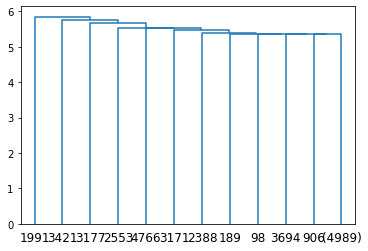

In [19]:
#Wave Data Set
sys.setrecursionlimit(20000)

X = waveData
Z = hierarchy.linkage(X.values, 'single')
dn = hierarchy.dendrogram(Z, truncate_mode='lastp', p=12)

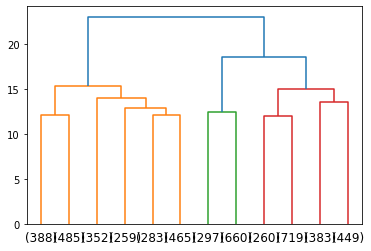

In [20]:
Z = hierarchy.linkage(X.values, 'complete')
dn = hierarchy.dendrogram(Z, truncate_mode='lastp', p=12)

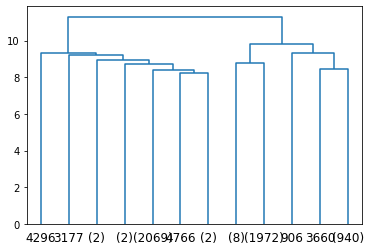

In [21]:
Z = hierarchy.linkage(X.values, 'average')
dn = hierarchy.dendrogram(Z, truncate_mode='lastp', p=12)


cancer data

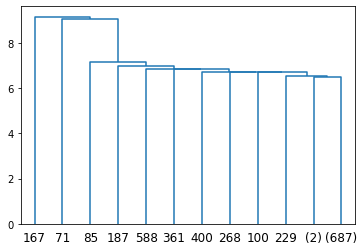

In [22]:
#cancer Data Set

sys.setrecursionlimit(20000)

X = cancerData
Z = hierarchy.linkage(X.values, 'single')
dn = hierarchy.dendrogram(Z, truncate_mode='lastp', p=12)




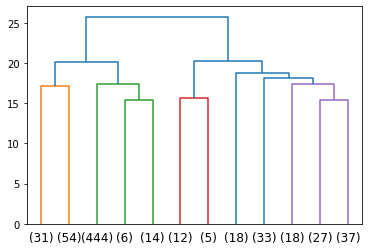

In [23]:
Z = hierarchy.linkage(X.values, 'complete')
dn = hierarchy.dendrogram(Z, truncate_mode='lastp', p=12)

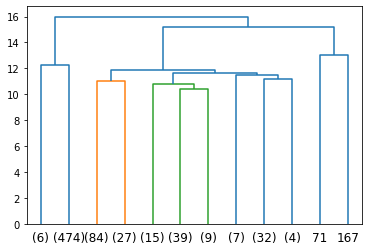

In [24]:
Z = hierarchy.linkage(X.values, 'average')
dn = hierarchy.dendrogram(Z, truncate_mode='lastp', p=12)